In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind
import scipy.stats as stats
from collections import Counter
from functions import *

# Data Exploration (and Cleaning)

In [39]:
url1 = r'C:\Users\VSPC\Documents\GitHub\New-Web-Study\data\raw\df_final_demo.txt'
url2 = r'C:\Users\VSPC\Documents\GitHub\New-Web-Study\data\raw\df_final_experiment_clients.txt'
url3 = r'C:\Users\VSPC\Documents\GitHub\New-Web-Study\data\raw\df_final_web_data_pt_1.txt'
url4 = r'C:\Users\VSPC\Documents\GitHub\New-Web-Study\data\raw\df_final_web_data_pt_2.txt'

df_final_demo = pd.read_csv(url1)
df_final_experiment_clients = pd.read_csv(url2)
df_web_data_1 = pd.read_csv(url3)
df_web_data_2 = pd.read_csv(url4)

### Check df_final_demo

In [40]:
data_summary(df_final_demo)

Number of columns -> 9
Number of rows -> 70609
Number of duplicates -> 0


,Column,Data Type,Values Count,Null Values,Unique Values
client_id,client_id,int64,70609,0,70609
clnt_tenure_yr,clnt_tenure_yr,float64,70595,14,54
clnt_tenure_mnth,clnt_tenure_mnth,float64,70595,14,482
clnt_age,clnt_age,float64,70594,15,165
gendr,gendr,object,70595,14,4
num_accts,num_accts,float64,70595,14,8
bal,bal,float64,70595,14,70328
calls_6_mnth,calls_6_mnth,float64,70595,14,8
logons_6_mnth,logons_6_mnth,float64,70595,14,9


There is some Null/Missing Values in all the columns and not the correct type in client_id

In [41]:
df_final_demo = rename_demo_columns(df_final_demo)

df_final_demo['client_id'] = df_final_demo['client_id'].astype(str)

In [42]:
# Search the rows with at least one null

null_id_demo = df_final_demo[df_final_demo.isna().any(axis=1)]

null_id_demo['client_id'] # For save the client_id with Nulls

4164     7402828
8316      355337
8677     8412164
9583     4666211
13444    2222915
18066    4876926
25961    5277910
28432    7616759
35323    8191345
43518    1227228
46076    8611797
47189    5144725
49846    1037867
63701    1618749
66219    6021001
Name: client_id, dtype: object

In [43]:
df_final_demo = rename_demo_columns(df_final_demo)

df_final_demo['client_id'] = df_final_demo['client_id'].astype(str)

In [44]:
df_final_demo_drop_nulls = df_final_demo.dropna(thresh=2)

df_final_demo_drop_nulls[df_final_demo_drop_nulls.isna().any(axis=1)]

,client_id,seniority_per_years,seniority_per_months,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month
9583,4666211,8.0,106.0,NaN,F,2.0,42550.55,4.0,7.0


In [45]:
# Lets fill the NaN in age

df_final_demo_drop_nulls['age'] = df_final_demo_drop_nulls['age'].fillna(df_final_demo_drop_nulls['age'].mean())

data_summary(df_final_demo_drop_nulls)

Number of columns -> 9
Number of rows -> 70595
Number of duplicates -> 0


C:\Users\VSPC\AppData\Local\Temp\ipykernel_10376\1219698369.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_demo_drop_nulls['age'] = df_final_demo_drop_nulls['age'].fillna(df_final_demo_drop_nulls['age'].mean())


,Column,Data Type,Values Count,Null Values,Unique Values
client_id,client_id,object,70595,0,70595
seniority_per_years,seniority_per_years,float64,70595,0,54
seniority_per_months,seniority_per_months,float64,70595,0,482
age,age,float64,70595,0,166
gender,gender,object,70595,0,4
number_of_accounts,number_of_accounts,float64,70595,0,8
balance,balance,float64,70595,0,70328
calls_6_month,calls_6_month,float64,70595,0,8
logons_6_month,logons_6_month,float64,70595,0,9


In [46]:
# Create .csv cleaned

folder_path = r'C:\Users\VSPC\Documents\GitHub\New-Web-Study\data'

file_path = folder_path + "/df_final_demo_cleanead.csv"

df_final_demo_drop_nulls.to_csv(file_path, index=False)

print(f"File saved to: {file_path}")

File saved to: C:\Users\VSPC\Documents\GitHub\New-Web-Study\data/df_final_demo_cleanead.csv


In [47]:
# Check the general summary of num data

demo_cols_num = ['seniority_per_years', 'seniority_per_months', 'age', 'number_of_accounts', 'balance', 'calls_6_month', 'logons_6_month'] 
demo_cols_cat = ['gender']

df_final_demo_drop_nulls[demo_cols_num].describe()

,seniority_per_years,seniority_per_months,age,number_of_accounts,balance,calls_6_month,logons_6_month
count,70595.000000,70595.000000,70595.000000,70595.000000,7.059500e+04,70595.000000,70595.000000
mean,12.052950,150.659367,46.442240,2.255528,1.474452e+05,3.382478,5.566740
std,6.871819,82.089854,15.591162,0.534997,3.015087e+05,2.236580,2.353286
min,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,6.000000,82.000000,32.500000,2.000000,3.734683e+04,1.000000,4.000000
50%,11.000000,136.000000,47.000000,2.000000,6.333290e+04,3.000000,5.000000
75%,16.000000,192.000000,59.000000,2.000000,1.375449e+05,6.000000,7.000000
max,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


### Check web data (pt1 and pt2)

In [48]:
df_web_data_total = pd.concat([df_web_data_1, df_web_data_2], axis=0)

data_summary(df_web_data_total)

Number of columns -> 5
Number of rows -> 755405
Number of duplicates -> 10764


,Column,Data Type,Values Count,Null Values,Unique Values
client_id,client_id,int64,755405,0,120157
visitor_id,visitor_id,object,755405,0,130236
visit_id,visit_id,object,755405,0,158095
process_step,process_step,object,755405,0,5
date_time,date_time,object,755405,0,629363


In [49]:
df_web_data_total['client_id'] = df_web_data_total['client_id'].astype(str)

df_web_data_total['date_time'] = pd.to_datetime(df_web_data_total['date_time'])

In [50]:
# Divide 'date_time' in two columns: Date and Time

df_web_data_total['date'] = df_web_data_total['date_time'].dt.date
df_web_data_total['time'] = df_web_data_total['date_time'].dt.time


df_web_data_total.head(5)


,client_id,visitor_id,visit_id,process_step,date_time,date,time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,2017-04-17,15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,2017-04-17,15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,2017-04-17,15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,2017-04-17,15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,2017-04-17,15:18:04


In [51]:
# We decided to drop the duplicate rows as we believe it may be due to a logging error (e.g. logging a double click)

df_web_data_total = df_web_data_total.drop_duplicates()

data_summary(df_web_data_total)

Number of columns -> 7
Number of rows -> 744641
Number of duplicates -> 0


,Column,Data Type,Values Count,Null Values,Unique Values
client_id,client_id,object,744641,0,120157
visitor_id,visitor_id,object,744641,0,130236
visit_id,visit_id,object,744641,0,158095
process_step,process_step,object,744641,0,5
date_time,date_time,datetime64[ns],744641,0,629363
date,date,object,744641,0,98
time,time,object,744641,0,77640


In [52]:
folder_path = r'C:\Users\VSPC\Documents\GitHub\New-Web-Study\data'

file_path = folder_path + "/df_web_data_total.csv"

df_web_data_total.to_csv(file_path, index=False)

print(f"File saved to: {file_path}")

File saved to: C:\Users\VSPC\Documents\GitHub\New-Web-Study\data/df_web_data_total.csv


### Check experiment csv

In [53]:
data_summary(df_final_experiment_clients)

Number of columns -> 2
Number of rows -> 70609
Number of duplicates -> 0


,Column,Data Type,Values Count,Null Values,Unique Values
client_id,client_id,int64,70609,0,70609
Variation,Variation,object,50500,20109,2


In [54]:
# Create list with client_id for compare each df

list_id_final_demo = df_final_demo['client_id']

list_id_final_exp = df_final_experiment_clients['client_id']

common_clients_id = set(list_id_final_demo).intersection(set(list_id_final_exp))
demo_clients_id = set(list_id_final_demo).difference(set(list_id_final_exp))
exp_clients_id = set(list_id_final_exp).difference(set(list_id_final_demo))

{
    "Commons ID": len(common_clients_id),
    "Demo ID": len(demo_clients_id),
    "Exp ID": len(exp_clients_id)
}

{'Commons ID': 0, 'Demo ID': 70609, 'Exp ID': 70609}

We apply LightGBM for complete the dataset using clean dataframes.

In [55]:
url5 = r'C:\Users\VSPC\Documents\GitHub\New-Web-Study\data\df_final_clients_data.csv'

df_final_data = pd.read_csv(url5)

data_summary(df_final_data)

Number of columns -> 16
Number of rows -> 443784
Number of duplicates -> 0


,Column,Data Type,Values Count,Null Values,Unique Values
client_id,client_id,int64,443784,0,70595
seniority_per_years,seniority_per_years,float64,443784,0,54
seniority_per_months,seniority_per_months,float64,443784,0,482
age,age,float64,443784,0,166
gender,gender,object,443784,0,4
number_of_accounts,number_of_accounts,float64,443784,0,8
balance,balance,float64,443784,0,70327
calls_6_month,calls_6_month,float64,443784,0,8
logons_6_month,logons_6_month,float64,443784,0,9
visitor_id,visitor_id,object,443784,0,78169


# EDA

## Demographics + Variation

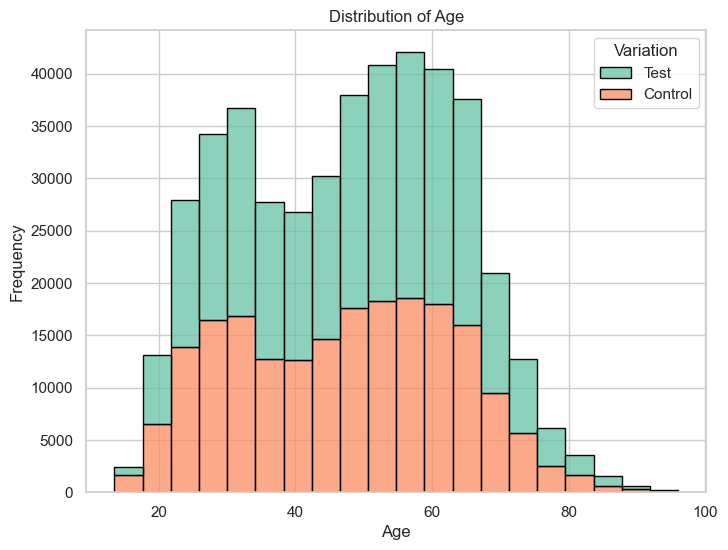

In [56]:
# 1. Distribution per age

plt.figure(figsize=(8,6))
sns.histplot(data=df_final_data, x='age', hue='Variation', bins=20, 
             palette='Set2', edgecolor='black', multiple='stack')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

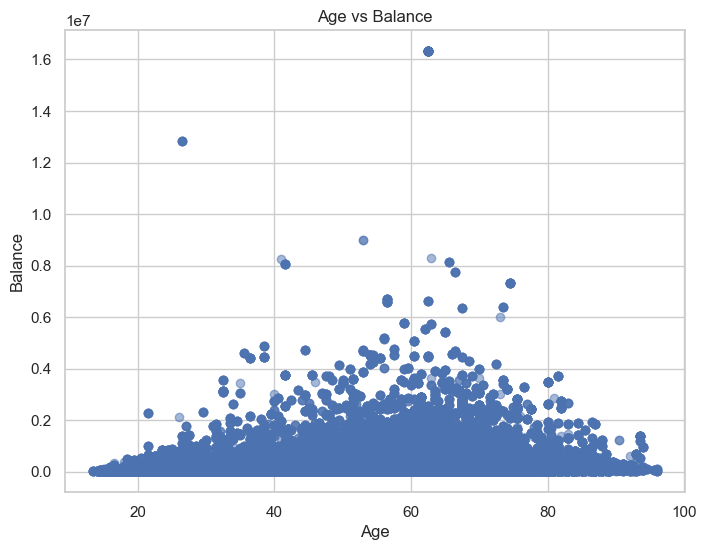

In [57]:
# Age and Balance

plt.figure(figsize=(8, 6))
plt.scatter(df_final_data['age'], df_final_data['balance'], alpha=0.5)
plt.title('Age vs Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.grid(True)
plt.show()

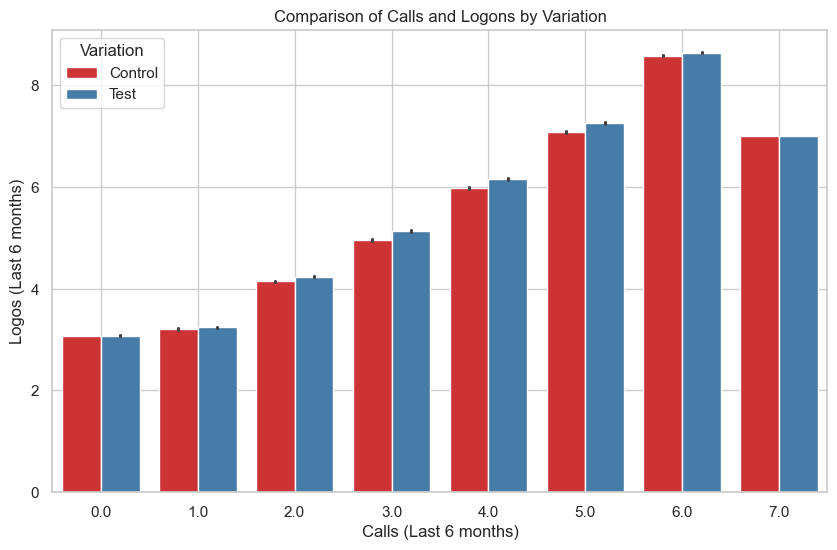

In [58]:
# Logons and calls last 6 months per group

plt.figure(figsize=(10, 6))
sns.barplot(data=df_final_data, 
            x='calls_6_month', 
            y='logons_6_month', 
            hue='Variation', 
            palette='Set1')
plt.title('Comparison of Calls and Logons by Variation')
plt.xlabel('Calls (Last 6 months)')
plt.ylabel('Logos (Last 6 months)')
plt.grid(True)
plt.show()


<Figure size 800x600 with 0 Axes>

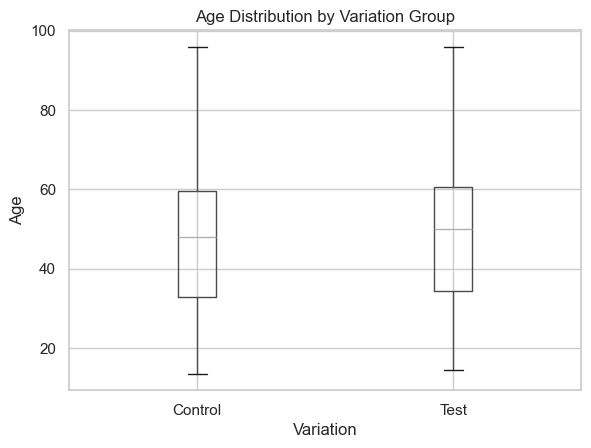

In [59]:
# Age and Variation
plt.figure(figsize=(8, 6))
df_final_data.boxplot(column='age', by='Variation')
plt.title('Age Distribution by Variation Group')
plt.suptitle('')
plt.xlabel('Variation')
plt.ylabel('Age')
plt.grid(True)
plt.show()

# Hipothesis and metrics

Dataframes:
- df_final_data

### Metrics: balance, logons_6_months

In [60]:


group_test = df_final_data[df_final_data['Variation'] == 'Test']
group_control = df_final_data[df_final_data['Variation'] == 'Control']

metrics = ['logons_6_month', 'balance']

t_test_results = {}

for metric in metrics:
    t_stat, p_value = ttest_ind(group_test[metric].dropna(), group_control[metric].dropna(), equal_var=False)
    t_test_results[metric] = {'t_statistic': t_stat, 'p_value': p_value}

df_t_test_results = pd.DataFrame(t_test_results).T
df_t_test_results


,t_statistic,p_value
logons_6_month,0.045854,9.634263e-01
balance,5.236915,1.633568e-07


Logins in last 6 months has not an importance difference. Balance: yes (as we expected from LightGMB)

C:\Users\VSPC\AppData\Local\Temp\ipykernel_10376\2719196878.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Variation', y='logons_6_month', data=df_final_data, ax=ax[0], palette="Set2")
C:\Users\VSPC\AppData\Local\Temp\ipykernel_10376\2719196878.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Variation', y='balance', data=df_final_data, ax=ax[1], palette="Set2")


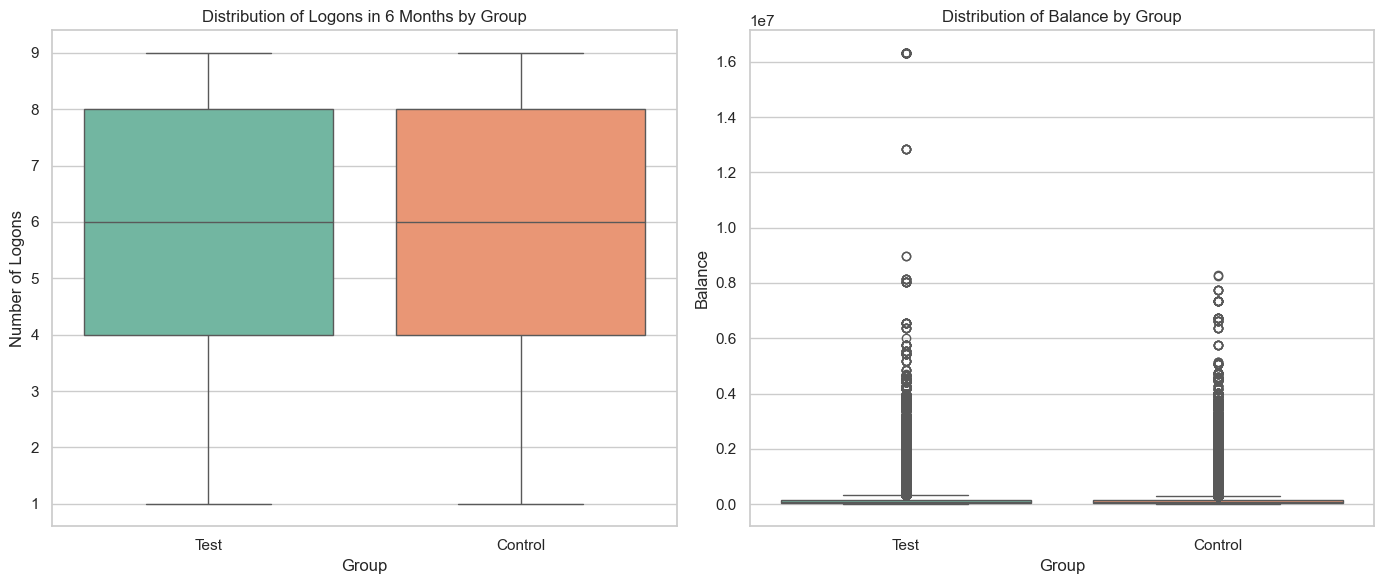

In [61]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='Variation', y='logons_6_month', data=df_final_data, ax=ax[0], palette="Set2")
ax[0].set_title('Distribution of Logons in 6 Months by Group')
ax[0].set_xlabel('Group')
ax[0].set_ylabel('Number of Logons')

sns.boxplot(x='Variation', y='balance', data=df_final_data, ax=ax[1], palette="Set2")
ax[1].set_title('Distribution of Balance by Group')
ax[1].set_xlabel('Group')
ax[1].set_ylabel('Balance')

plt.tight_layout()
plt.show()

### Conversion_rate and dropout_rate

In [62]:


conversion_table = conversion_rate(df_final_data)
conversion_table

Variation,Control,Test
process_step,,
confirm,54.936546,70.703390
start,93.903394,91.490966
step_1,80.278974,83.984620
step_2,77.726841,73.879828
step_3,74.665959,67.574699


In [63]:
dropout_table = 100 - conversion_table

dropout_table

Variation,Control,Test
process_step,,
confirm,45.063454,29.296610
start,6.096606,8.509034
step_1,19.721026,16.015380
step_2,22.273159,26.120172
step_3,25.334041,32.425301


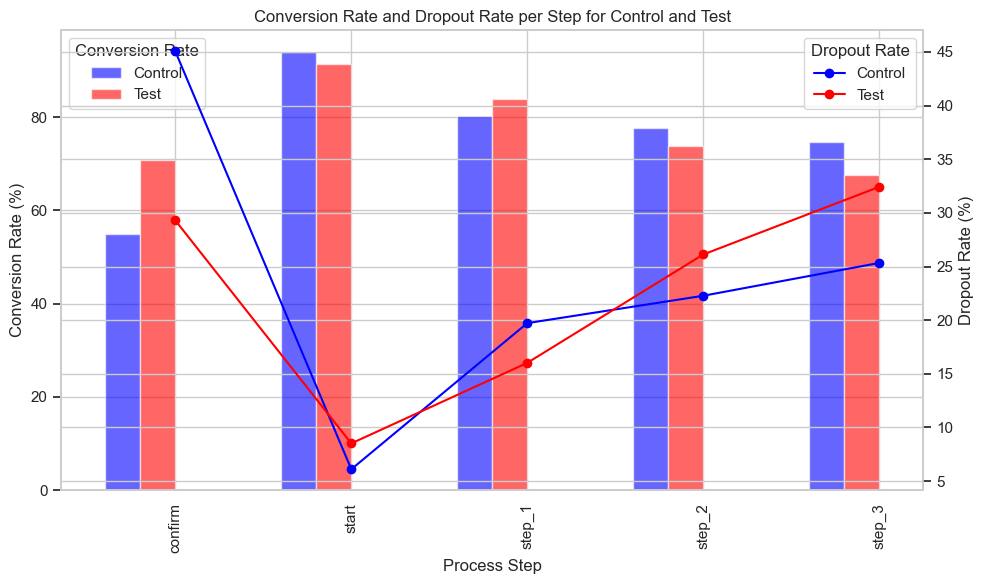

In [64]:
fig, ax1 = plt.subplots(figsize=(10,6))

conversion_table.plot(kind='bar', ax=ax1, alpha=0.6, width=0.4, position=1, color=['blue', 'red'])
ax1.set_xlabel('Process Step')
ax1.set_ylabel('Conversion Rate (%)')
ax1.set_title('Conversion Rate and Dropout Rate per Step for Control and Test')
ax1.legend(loc='upper left', title="Conversion Rate")

ax2 = ax1.twinx()
dropout_table.plot(kind='line', marker='o', ax=ax2, color=['blue', 'red'])
ax2.set_ylabel('Dropout Rate (%)')
ax2.legend(loc='upper right', title="Dropout Rate")

plt.tight_layout()
plt.show()

### Avg_time_per_step

In [65]:
# Avg_time_per_step

avg_kpi_avg_time = avg_time_per_step(df_final_data)

avg_kpi_avg_time


Variation,Control,Test
process_step,,
confirm,128.626792,130.057396
start,172.450639,157.901331
step_1,42.554818,38.717192
step_2,39.916188,47.373180
step_3,96.076445,96.544770


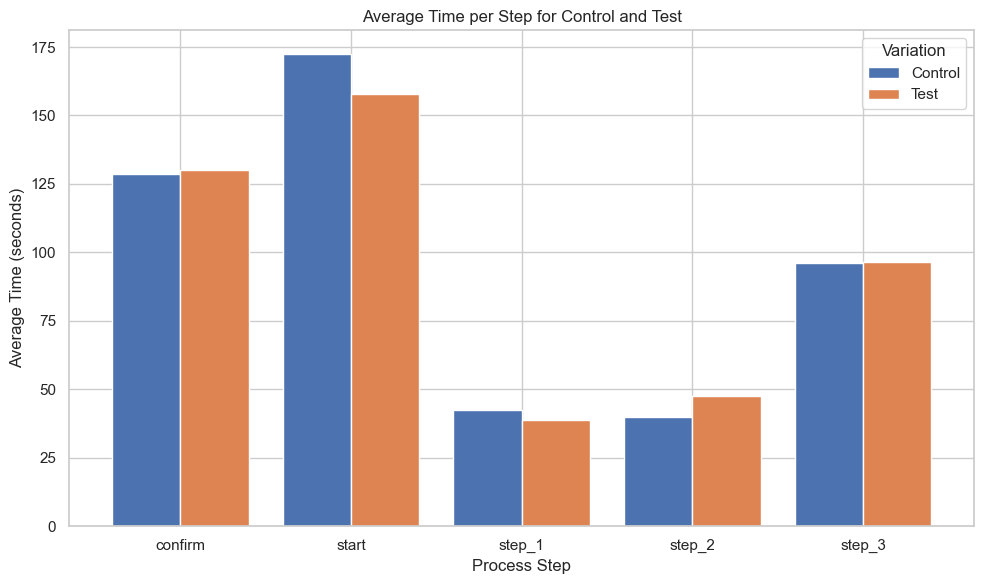

In [66]:
avg_kpi_avg_time.plot(kind='bar', figsize=(10,6), width=0.8)
    
plt.title('Average Time per Step for Control and Test')
plt.xlabel('Process Step')
plt.ylabel('Average Time (seconds)')
plt.xticks(rotation=0)  
plt.legend(title="Variation")

plt.tight_layout()
plt.show()

### Performance by age

In [67]:
# Split ages
df_age_performance = df_final_data

age_bins = [18, 30, 40, 50, 60, 70, 100]
age_labels = ['18-30', '30-40', '40-50', '50-60', '60-70', '70+']
df_age_performance['age_group'] = pd.cut(df_age_performance['age'], bins=age_bins, labels=age_labels, right=False)

In [68]:
df_sorted = df_age_performance.sort_values(by=['visit_id', 'date_time'])

df_sorted['time_spent'] = df_sorted.groupby(['visit_id'])['date_time'].diff()

avg_time_by_age_group = df_sorted.groupby(['age_group', 'Variation', 'process_step']).agg(
    avg_time_spent=('time_spent', lambda x: x.mean().total_seconds() if pd.notnull(x.mean()) else 0)
    ).reset_index()

pivot_time_age = avg_time_by_age_group.pivot(index=['age_group', 'process_step'], columns='Variation', values='avg_time_spent')

pivot_time_age

C:\Users\VSPC\AppData\Local\Temp\ipykernel_10376\2031574218.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_time_by_age_group = df_sorted.groupby(['age_group', 'Variation', 'process_step']).agg(


Variation                  Control        Test
age_group process_step                        
18-30     confirm        93.670511   96.223830
          start         146.925071  141.895157
          step_1         31.400000   31.480366
          step_2         26.350241   36.058434
          step_3         88.157894   93.376155
30-40     confirm       101.563714   98.901083
          start         146.420058  141.703753
          step_1         35.358815   31.287118
          step_2         30.736158   38.607787
          step_3         96.873133   93.892636
40-50     confirm       119.684058  114.853365
          start         180.708355  163.057903
          step_1         37.542070   35.043185
          step_2         38.642514   39.908203
          step_3        111.753678  111.546036
50-60     confirm       137.019818  144.046321
          start         180.387871  157.984621
          step_1         46.432412   41.910359
          step_2         46.117795   50.867086
          step_3        109.978432  107.886608
60-70     confirm       170.693055  176.111919
          start         183.005985  167.631749
          step_1         52.445569   46.498768
          step_2         52.060313   57.660273
          step_3         74.561354   80.547200
70+       confirm       201.879018  204.017795
          start         210.132897  179.786516
          step_1         64.376466   49.998378
          step_2         60.819206   69.731612
          step_3         81.695652   86.005938

In [69]:
completion_rate_by_age = df_final_data.groupby(['age_group', 'Variation', 'process_step'])['client_id'].nunique().reset_index()
total_clients_by_age = df_final_data.groupby(['age_group', 'Variation'])['client_id'].nunique().reset_index(name='total_users')

last_step_completion = completion_rate_by_age[completion_rate_by_age['process_step'] == 'confirm']

completion_rate_final = pd.merge(last_step_completion, total_clients_by_age, on=['age_group', 'Variation'])

completion_rate_final['completion_rate'] = (completion_rate_final['client_id'] / completion_rate_final['total_users']) * 100

pivot_completion_rate_age = completion_rate_final.pivot(index='age_group', columns='Variation', values='completion_rate')

pivot_completion_rate_age


C:\Users\VSPC\AppData\Local\Temp\ipykernel_10376\808828449.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  completion_rate_by_age = df_final_data.groupby(['age_group', 'Variation', 'process_step'])['client_id'].nunique().reset_index()
C:\Users\VSPC\AppData\Local\Temp\ipykernel_10376\808828449.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_clients_by_age = df_final_data.groupby(['age_group', 'Variation'])['client_id'].nunique().reset_index(name='total_users')


Variation,Control,Test
age_group,,
18-30,55.296334,76.408801
30-40,54.173713,71.904266
40-50,55.446317,72.302622
50-60,55.481472,69.411632
60-70,55.806730,67.984542
70+,47.838480,56.898029


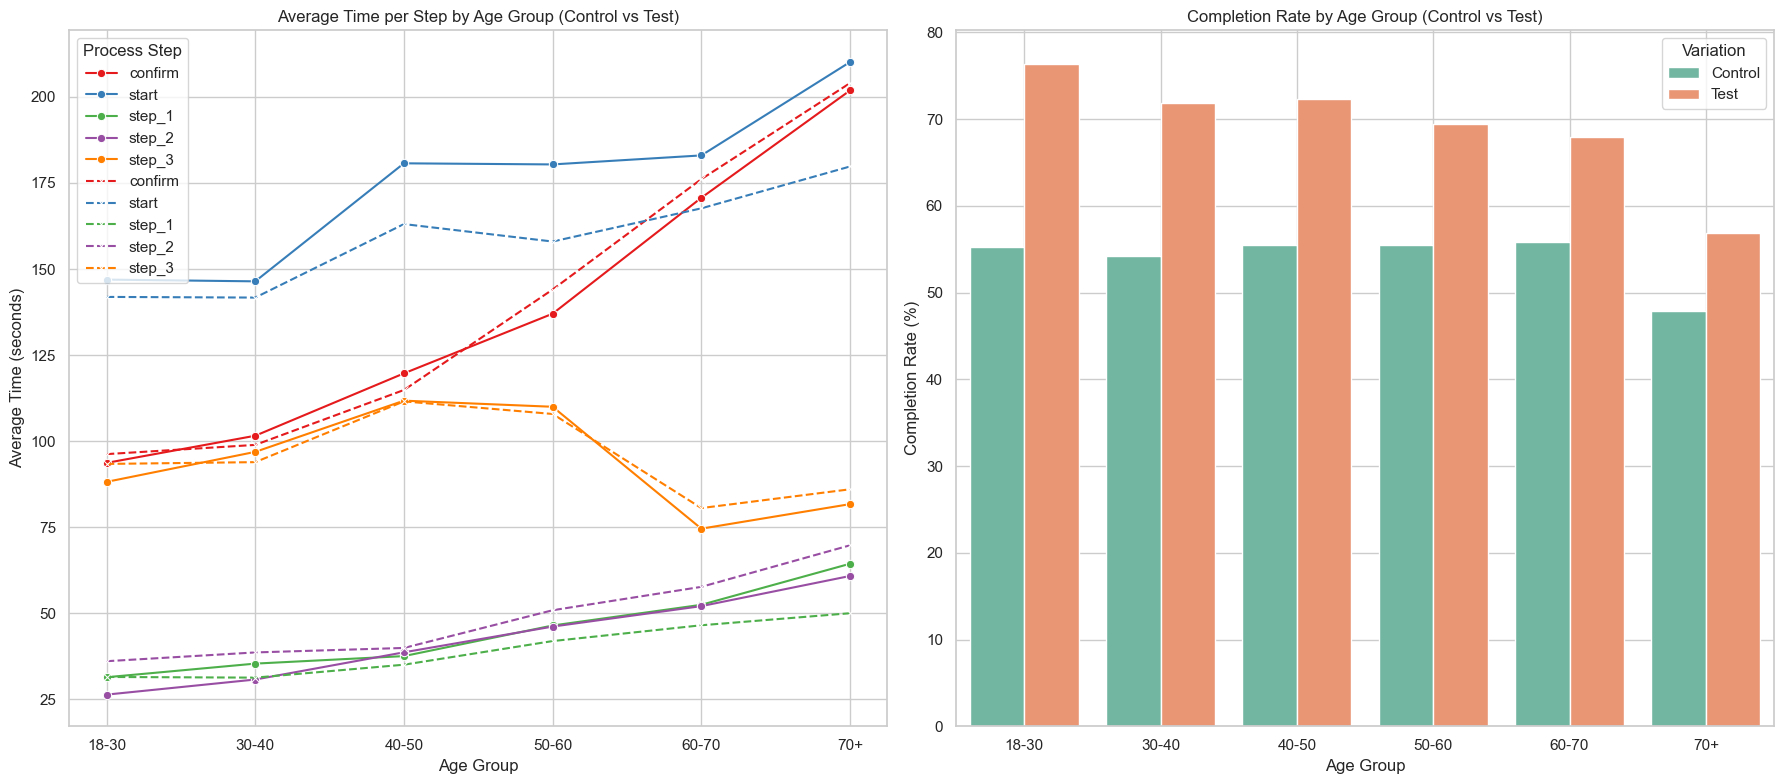

In [70]:
sns.set(style="whitegrid")

# Create one image with two charts: avg_time per step and completion rate
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Chart 1: time spend it per age
pivot_time_age.reset_index(inplace=True)
sns.lineplot(data=pivot_time_age, x='age_group', y='Control', hue='process_step', marker='o', ax=ax1, palette='Set1', linestyle='-')
sns.lineplot(data=pivot_time_age, x='age_group', y='Test', hue='process_step', marker='x', ax=ax1, palette='Set1', linestyle='--')

# Configurar etiquetas y leyendas
ax1.set_title('Average Time per Step by Age Group (Control vs Test)')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Average Time (seconds)')
ax1.legend(title='Process Step')
ax1.grid(True)

# Chart 2: completion rate per age
pivot_completion_rate_age.reset_index(inplace=True)
sns.barplot(data=pivot_completion_rate_age.melt(id_vars='age_group', value_name='Completion Rate'), 
            x='age_group', y='Completion Rate', hue='Variation', ax=ax2, palette='Set2')

ax2.set_title('Completion Rate by Age Group (Control vs Test)')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Completion Rate (%)')
ax2.legend(title='Variation')
ax2.grid(True)

plt.tight_layout()
plt.show()


## Review possible bias in age groups

In the metric tests and visualizations, large differences are noted between the different age groups when divided between Control and Test.

In [72]:
bins = [18, 30, 40, 50, 60, 70, 100]
labels = ['18-30', '30-40', '40-50', '50-60', '60-70', '70+']
df_final_data['age_group'] = pd.cut(df_final_data['age'], bins=bins, labels=labels, right=False)

# Create crosstab for Chi-square
contingency_table = pd.crosstab(df_final_data['age_group'], df_final_data['Variation'])
chi2_stat, chi2_pval, _, _ = stats.chi2_contingency(contingency_table)

ttest_results = {}

ttest_results['Age Group Distribution (Chi-Squared)'] = (chi2_stat, chi2_pval)

ttest_results

{'Age Group Distribution (Chi-Squared)': (np.float64(589.2667706686491),
  np.float64(4.2154354288860123e-125))}

This means that the distribution of customers by age group is not equal between the two groups. This could be a bias issue in the experiment design, as age groups may influence the way users interact with the new website (Test) and the old one (Control)

In [73]:
# Create a chart for visualize the difference

bins = [18, 30, 40, 50, 60, 70, 100]
labels = ['18-30', '30-40', '40-50', '50-60', '60-70', '70+']

control_group = df_final_data[df_final_data['Variation'] == 'Control']
test_group = df_final_data[df_final_data['Variation'] == 'Test']

plt.figure(figsize=(12, 6))

age_distribution_control = control_group['age_group'].value_counts(normalize=True).sort_index() * 100
age_distribution_test = test_group['age_group'].value_counts(normalize=True).sort_index() * 100

bar_width = 0.4
index = range(len(labels))

plt.bar(index, age_distribution_control, width=bar_width, label='Control', color='skyblue', alpha=0.7)
plt.bar([i + bar_width for i in index], age_distribution_test, width=bar_width, label='Test', color='salmon', alpha=0.7)

plt.xlabel('Age Groups')
plt.ylabel('Percentage of Clients (%)')
plt.title('Age Group Distribution for Control and Test Groups')
plt.xticks([i + bar_width/2 for i in index], labels)
plt.legend(title='Variation')

plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

NameError: name 'control_group' is not defined